In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img=cv.imread('coca-cola-logo.png')

In [3]:
imgrev=img[:,:,:: -1]

(-0.5, 699.5, 699.5, -0.5)

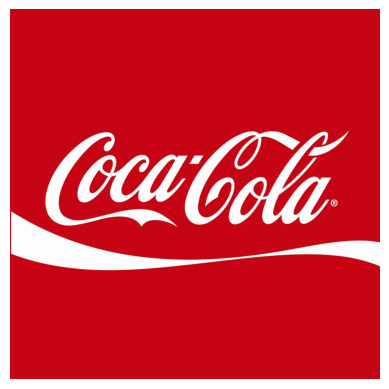

In [4]:
plt.imshow(imgrev)
plt.axis('off')

In [5]:
print(imgrev.shape)

(700, 700, 3)


In [6]:
h,w,c=imgrev.shape

In [7]:
topleft=imgrev[0:h//2,0:w//2]
topright=imgrev[0:h//2,w//2:w]
bottomleft=imgrev[h//2:h,0:w//2]
bottomright=imgrev[h//2:h,w//2:w]

(-0.5, 349.5, 349.5, -0.5)

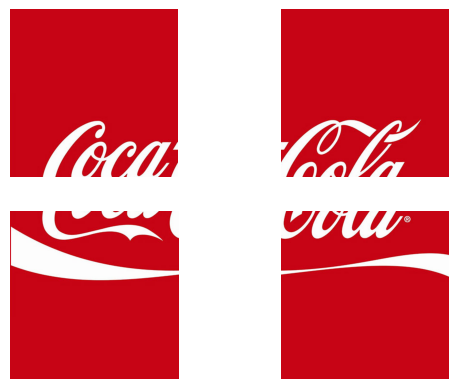

In [8]:
plt.subplot(2,2,1)
plt.imshow(topleft)
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(topright)
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(bottomleft)
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(bottomright)
plt.axis('off')

In [9]:
img_r90=cv.rotate(imgrev,cv.ROTATE_90_CLOCKWISE)
img_rc90=cv.rotate(imgrev,cv.ROTATE_90_COUNTERCLOCKWISE)
img_r180=cv.rotate(imgrev,cv.ROTATE_180)

(-0.5, 699.5, 699.5, -0.5)

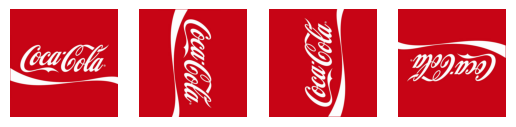

In [10]:
plt.subplot(1,4,1)
plt.imshow(imgrev)
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(img_r90)
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(img_rc90)
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(img_r180)
plt.axis('off')

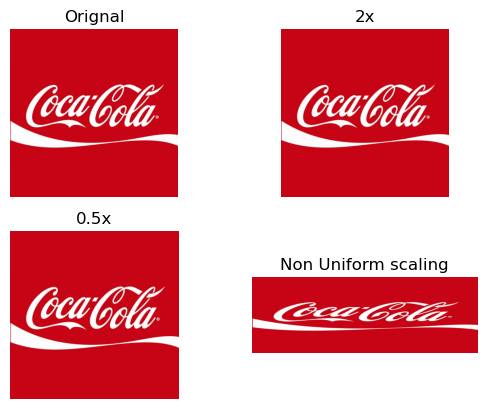

In [11]:
h,w,c=img.shape
twox=cv.resize(imgrev,None,fx=2,fy=2,interpolation=cv.INTER_LINEAR)
halfx=cv.resize(imgrev,(w//2,h//2),interpolation=cv.INTER_AREA)
nonUnf=cv.resize(imgrev,None,fx=1.5,fy=0.5)
images=[imgrev,twox,halfx,nonUnf]
titles=['Orignal','2x','0.5x','Non Uniform scaling']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.axis('off')
    

(-0.5, 699.5, 699.5, -0.5)

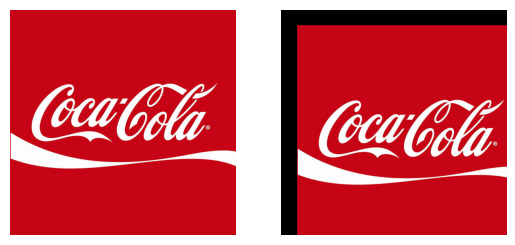

In [12]:
tx=50;ty=50
h,w,c=imgrev.shape
M=np.float32([[1,0,tx],[0,1,ty]])
trans_img=cv.warpAffine(imgrev,M,(w,h))
plt.subplot(1,2,1)
plt.imshow(imgrev)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(trans_img)
plt.axis('off')

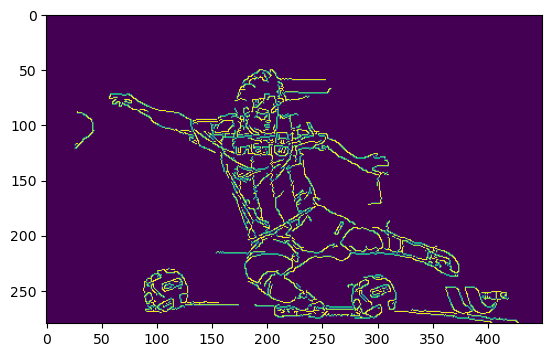

In [13]:
mimg=cv.imread('messi.jpeg')
img_gray=cv.cvtColor(mimg,cv.COLOR_BGR2GRAY)
edges=cv.Canny(mimg,threshold1=100,threshold2=350)
plt.imshow(edges)

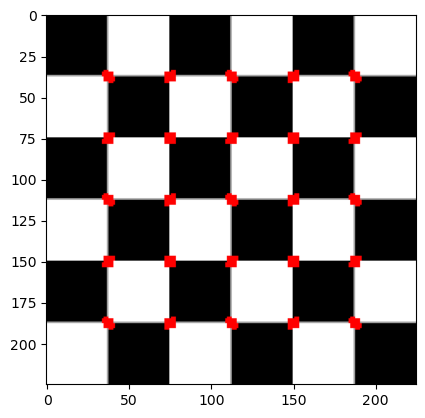

In [14]:
chess=cv.imread('chessboard.png')
chess_grey=cv.cvtColor(chess,cv.COLOR_BGR2GRAY)
chess_greyf=np.float32(chess_grey)
cor=cv.cornerHarris(chess_greyf,2,5,0.02)
cor=cv.dilate(cor,None)
chess[cor>0.01*cor.max()]=[255,0,0]
plt.imshow(chess)

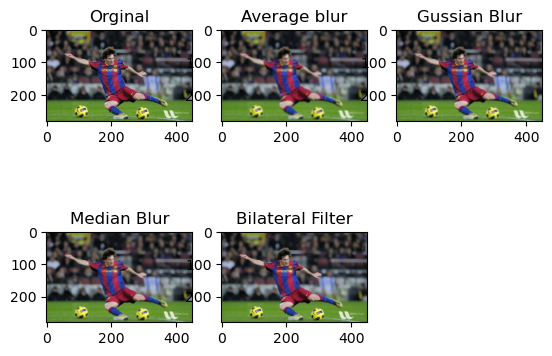

In [15]:
img=cv.imread('messi.jpeg')
img_rgb=img[:,:,::-1]
avgBlur=cv.blur(img_rgb,(5,5))
gussianBlur=cv.GaussianBlur(img_rgb,(5,5),1)

images=[img_rgb,avgBlur,gussianBlur]
titles=['Orginal','Average blur','Gussian Blur']
for i in range(4):
    plt.subplot(2,3,i+1)
    plt.title(titles[i])
    plt.imshow(images[i])

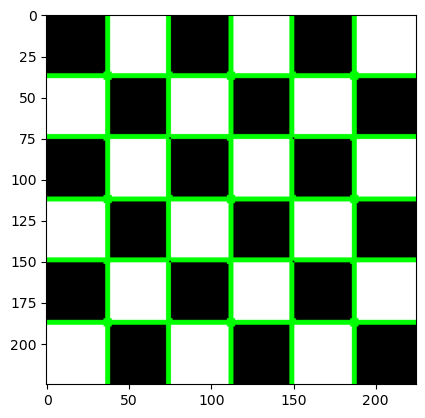

In [16]:
img=cv.imread('chessboard.png')
img_grey=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edge=cv.Canny(img_grey,threshold1=100,threshold2=200)
contours,hierarchy=cv.findContours(edge,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img,contours,-1,(0,255,0),2)
plt.imshow(img)

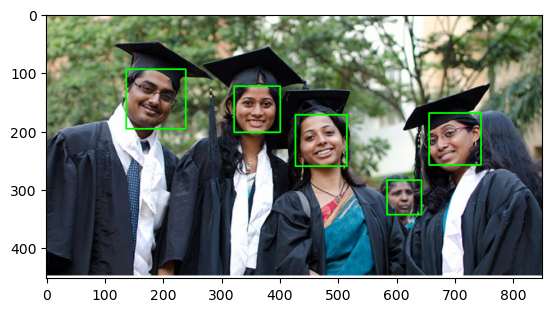

In [17]:
img=cv.imread('faces.png')
imgg=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
face_cascade=cv.CascadeClassifier(cv.data.haarcascades+"haarcascade_frontalface_default.xml")
faces=face_cascade.detectMultiScale(imgg,1.3,2)
for x,y,w,h in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
img_rgb=img[:,:,::-1]
plt.imshow(img_rgb)